# Bar Charts

## Classic

<Figure size 432x288 with 0 Axes>

<BarContainer object of 8 artists>

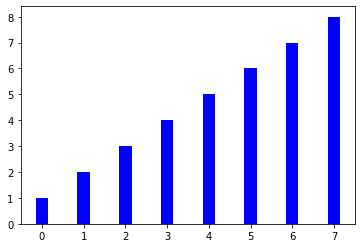

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import t
 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

linear_data = np.array([1,2,3,4,5,6,7,8])
exponential_data = linear_data**2

plt.figure()
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width = 0.3, color='blue')

## Stacked

### Vertical

<Figure size 432x288 with 0 Axes>

<BarContainer object of 8 artists>

<BarContainer object of 8 artists>

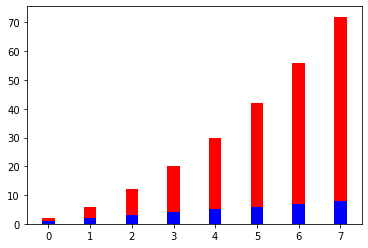

In [22]:
plt.figure()
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width = 0.3, color='b')
plt.bar(xvals, exponential_data, width = 0.3, bottom=linear_data, color='r')

### Horizzontal

<Figure size 432x288 with 0 Axes>

<BarContainer object of 8 artists>

<BarContainer object of 8 artists>

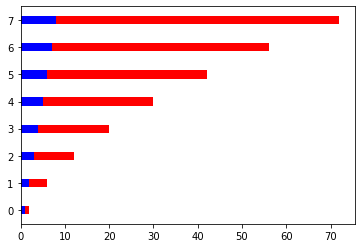

In [23]:
# or use barh for horizontal bar charts
plt.figure()
xvals = range(len(linear_data))
plt.barh(xvals, linear_data, height = 0.3, color='b')
plt.barh(xvals, exponential_data, height = 0.3, left=linear_data, color='r')

## With error bars

In [24]:
np.random.seed(123456)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df.shape
df.head(5)

(4, 3650)

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,125822.459981,-24572.668866,-269811.700635,-195126.474203,274422.405004,-2642.929811,55841.742259,-176847.193256,-140369.792670,-388913.843779,...,-80358.297627,-62681.870495,-34258.467703,-363519.496675,218045.856846,41261.938158,117661.585296,131490.047258,173495.068746,120505.200705
1993,-77958.794078,334839.789515,-124943.834500,234955.718926,42444.788803,130799.748570,157907.683937,6044.607261,-30215.249792,-2720.550499,...,114190.168396,83161.608088,95634.574816,25854.091600,59907.318045,116524.128542,53347.504865,43300.284935,367099.124725,84983.103971
1994,140207.310934,152940.649420,-33330.436354,7772.137566,150235.052801,97454.646993,25691.904151,-76818.717406,-6693.963971,-83389.166910,...,-141962.907672,-200835.268287,-75875.748389,214030.362899,295063.555413,-86796.634638,539498.475527,-130504.367107,-53839.038198,-96623.765032
1995,-2420.958988,86241.179825,42257.077168,62020.627870,7571.239439,-15588.129605,55177.308420,163752.961209,69232.357454,-609.867434,...,-58437.752962,17494.030215,-7051.911418,94613.671160,17305.403634,56962.483322,-35759.663264,111039.184152,69275.953204,-31188.334675


In [25]:
N = df.shape[1]
threshold=42000
confidence_interval = 0.095
years_mean = df.mean(axis=1)
years_std = df.std(axis=1)
percentiles = t.ppf(0.95, N-1)
y_err = (years_std * percentiles) / np.sqrt(N)
y_err

1992    5539.445952
1993    2731.531010
1994    3816.154980
1995    1942.088689
dtype: float64

<Figure size 1200x900 with 0 Axes>

Text(0.5, 1.0, 'Sample-Oriented Task-Driven Visualizations\n (Ferreira et al, 2014)')

([<matplotlib.axis.XTick at 0x1e826871cc8>,
 <a list of 4 Text xticklabel objects>)

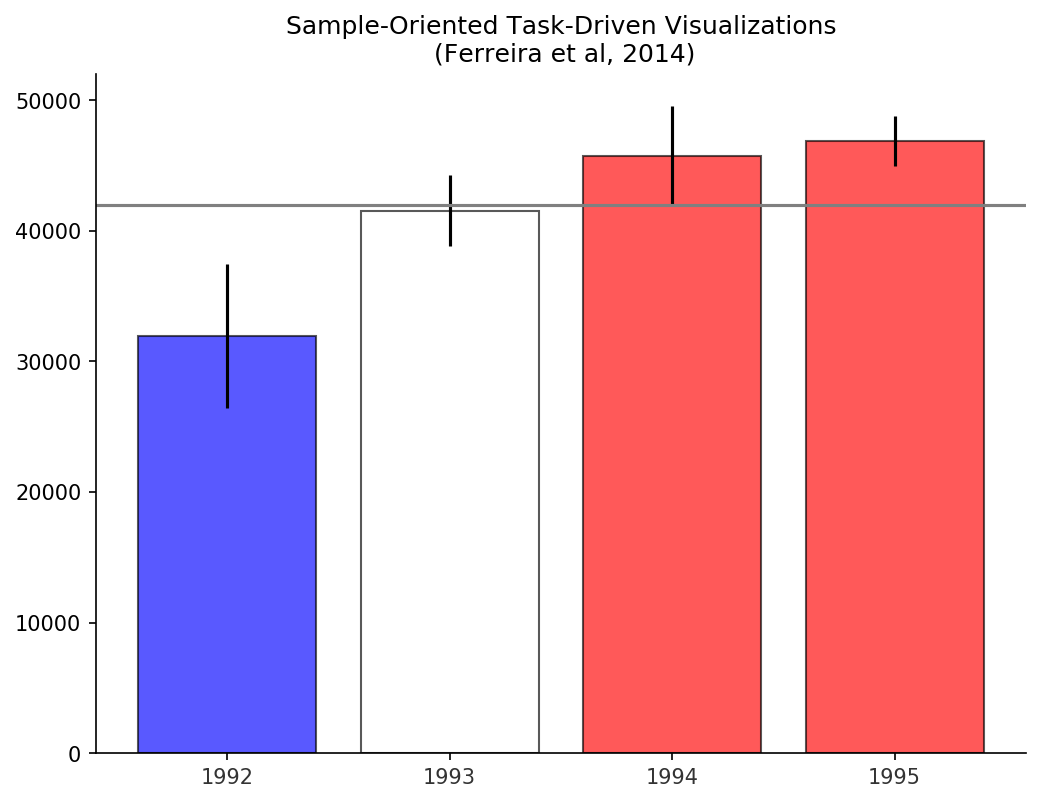

In [42]:
plt.figure(figsize=(8, 6), dpi=150)

# Drawing bars and threshold line
bar_colors = ['blue', 'white', 'red', 'red']
bars = plt.bar(x=np.arange(df.shape[0]), height=years_mean, yerr=y_err, alpha=0.65, color=bar_colors, edgecolor='black')
plt.axhline(y = threshold, color = 'grey', alpha = 1)

# Setting the axis and title
plt.title('Sample-Oriented Task-Driven Visualizations\n (Ferreira et al, 2014)')
plt.xticks(range(df.shape[0]), ['1992', '1993', '1994', '1995'], alpha = 0.8)

# Removing the upper and right axis line of the chart
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()